In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


(1, 3, 3, 1)


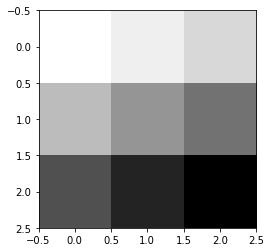

In [2]:
image = tf.constant([[[[1], [2], [3]],
                    [[4], [5], [6]],
                    [[7], [8], [9]]]], dtype=tf.float32)

# 어디가 가로 세로 채널 수 인지?
# input의 경우 {batch 수, height, width, chanel 수}

print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


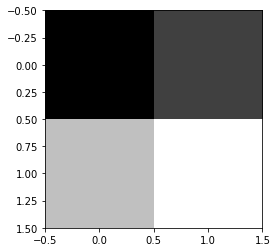

In [3]:
# padding 'VALUD'
print("image.shape", image.shape)
weight = np.array([[[[1.]], [[1.]]],
                  [[[1.]], [[1.]]]])

print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                             kernel_initializer=weight_init)(image)
# 필터의 경우
# {height, width, input channel 수, filter 개수}

print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2, 2))
plt.imshow(conv2d.numpy().reshape(2, 2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


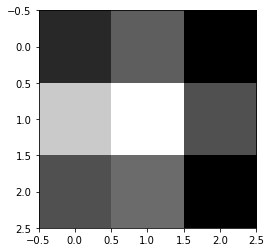

In [5]:
# padding 'SAME'
print("image.shape", image.shape)
weight = np.array([[[[1.]], [[1.]]],
                  [[[1.]], [[1.]]]])

print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3, 3))
plt.imshow(conv2d.numpy().reshape(3, 3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


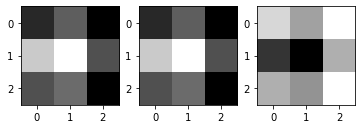

In [8]:
# padding 'SAME' AND AssertionErrorfilter 수 3
print("image.shape", image.shape)
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])

print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
# swapaxes 입력된 두 개의 축을 맞교환 한다.
# input의 경우 0은 batch 수 3은 channel 수

for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3, 3), cmap='gray')
plt.show()